In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = [[0.,0.], [1., 1.]]
Y = [0, 1]

In [ ]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5,
                    hidden_layer_sizes = (5, 2), random_state = 1)

'''
lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. 
It approximates the second derivative matrix updates with gradient evaluations. 
It stores only the last few updates, so it saves memory. 
It isn't super fast with large data sets. 
It will be the default solver as of Scikit-learn version 0.22.
'''

In [ ]:
clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf.predict([[2., 2.], [-1., -2.]])


array([1, 0])

#MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples = 200, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
regr = MLPRegressor(random_state = 1, max_iter = 500).fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
regr.predict(X_test[:2])

array([-0.98506347, -7.19854141])

In [ ]:
regr.score(X_test, y_test)

0.4162338898076595

# Craeting Partial Dependence Plots using MLPRegressor

Partial Dependence plots shows the dependence between target function and a set of 'target' features, marginalizing over teh values of all other features (the complement features).
Due to limits of human perception, size of target feature set must be small (usually one or two). 


Example shows how to obtain partial dependence plots from a MLPRegressor and a HistGradientBoostingRegressor trained on California housing dataset

In [ ]:
print(__doc__)

from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting # NoQA
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import fetch_california_housing

Automatically created module for IPython interactive environment


In [ ]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Fit MLPRegresssor and compute single-variable partial dependence plots

In [ ]:
print("Trainng a MLP Regressor....")
tic = time()
est = make_pipeline(QuantileTransformer(), 
                    MLPRegressor(hidden_layer_sizes = (50, 50),
                                 learning_rate_init = 0.01,
                                 early_stopping = True))

est.fit(X_train, y_train)
print ("done in {:.3f}s".format(time() - tic))
print("Test R2 score {:.2f}".format(est.score(X_test, y_test)))

Trainng a MLP Regressor....
done in 8.462s
Test R2 score 0.82


Computing partial dependence plots...
done in 3.184s


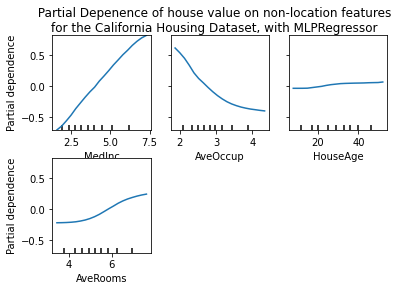

In [ ]:
print('Computing partial dependence plots...')

tic = time()
# We don't compute the 2-way PDP (5, 1), here , because it is a lot slower
# With the brute method
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']

plot_partial_dependence(est, X_train, features,
                        n_jobs = 3, grid_resolution = 20)

print("done in {:.3f}s".format(time() - tic))
fig = plt.gcf() # GCF : Get Current Figure
fig.suptitle ( ' Partial Depenence of house value on non-location features \n'
                'for the California Housing Dataset, with MLPRegressor')

fig.subplots_adjust(hspace = 0.3)

In [ ]:
print("Training Gradient Boosting Regressor...")
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print("done in {:.3f}s".format(time() - tic))
print("Test R2 score : {:.2f}".format(est.score(X_test, y_test)))

Training Gradient Boosting Regressor...
done in 0.598s
Test R2 score : 0.85


5 th feature is a combination of 2 features

Computing partial dependence plots....
done in 2.219s


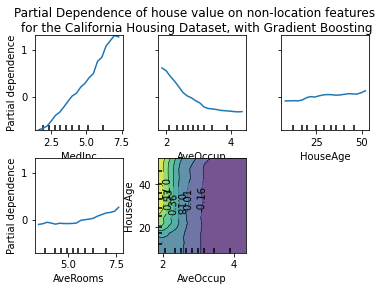

In [ ]:
print('Computing partial dependence plots....')

tic = time()
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms', ('AveOccup', 'HouseAge')]

plot_partial_dependence(est, X_train, features, n_jobs = 3, grid_resolution = 20)
print("done in {:.3f}s".format(time() - tic))

fig = plt.gcf()
fig.suptitle('Partial Dependence of house value on non-location features \n'
             'for the California Housing Dataset, with Gradient Boosting')

fig.subplots_adjust(wspace = 0.4, hspace = 0.3)

3D Interaction Plots

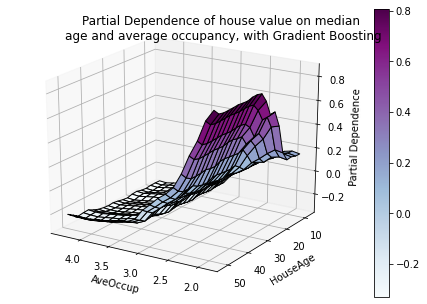

In [ ]:
fig = plt.figure()

features = ('AveOccup', 'HouseAge')
pdp, axes = partial_dependence(est, X_train, features = features, grid_resolution = 20)
XX, YY = np.meshgrid(axes[0], axes[1])

Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride = 1, cstride = 1,
                       cmap = plt.cm.BuPu, edgecolor = 'k')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial Dependence')

# pretty init view
ax.view_init(elev = 22, azim = 122)

plt.colorbar(surf)
plt.suptitle('Partial Dependence of house value on median \n'
              'age and average occupancy, with Gradient Boosting')

plt.subplots_adjust(top = 0.9)

plt.show()